# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../b1abb33c4f.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# Limpando as células de APGAR5 que estão prenchidas com NaN 
df = df[df['APGAR5'].notna()]
df['APGAR5'] = df['APGAR5'].apply(int)

In [4]:
df.loc[df['APGAR5'] <= 3, 'asfixia'] = 'asfixia_grave'

df.loc[(df['APGAR5'] > 3) & (df['APGAR5'] <= 5), 'asfixia'] = 'asfixia_moderada'

df.loc[(df['APGAR5'] > 5) & (df['APGAR5'] <= 7), 'asfixia'] = 'asfixia_leve'

df.loc[(df['APGAR5'] > 7), 'asfixia'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

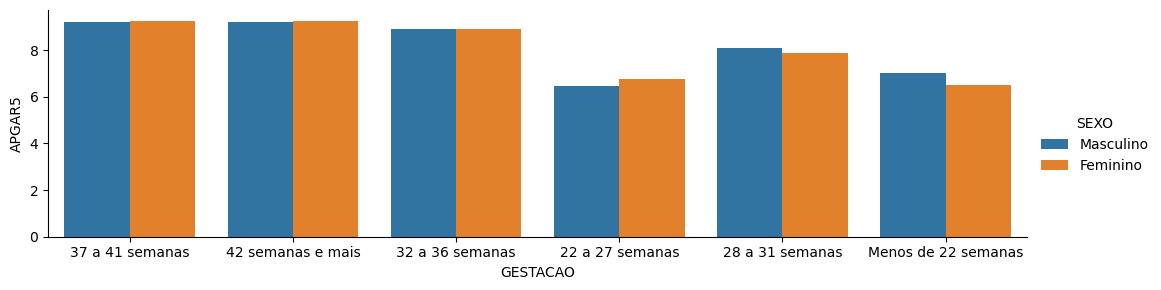

In [5]:
sns.catplot(x='GESTACAO', y='APGAR5'
            , hue='SEXO'
            , kind='bar'
            , data=df
            , errorbar=None,
            height=3,
            aspect=3.5
           );

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
cross = pd.crosstab(df['GESTACAO'], df['asfixia'])
cross

asfixia,asfixia_grave,asfixia_leve,asfixia_moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
cross_pct = cross.div(cross.sum(axis = 1), axis = 0)
cross_pct

asfixia,asfixia_grave,asfixia_leve,asfixia_moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

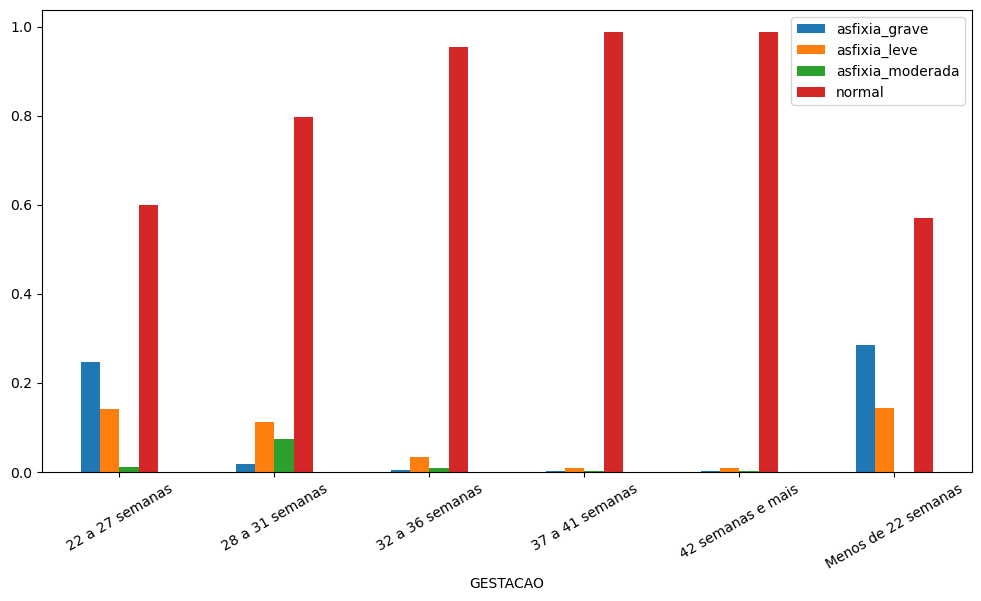

In [8]:
plt.rcParams["figure.figsize"] = (12,6)
cross_pct.plot.bar()
plt.legend(loc='best')
plt.xticks(rotation=30);

Partos prematuros tendem a ter uma menor pontuação de APGAR5, no geral. Se observamos os valores colocados como 'normal', vemos que eles aumentam de acordo com o tempo de geração – quanto maior o tempo, maior a ocorrência desse valor. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

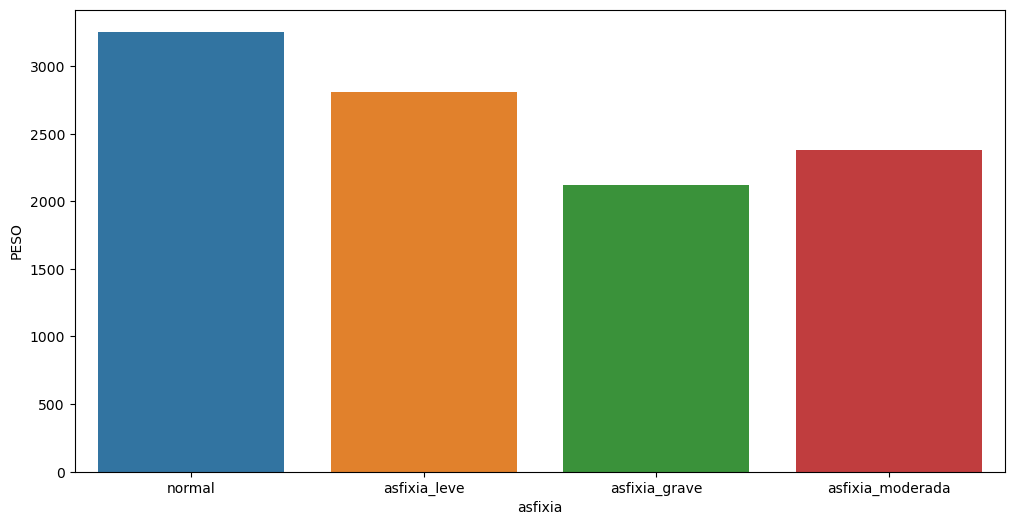

In [9]:
sns.barplot(x = 'asfixia', y = 'PESO', data = df, errorbar=None);

Parece haver uma relação entre valor de APGAR5 (aqui transformado em categorias) e peso, uma vez que recém-nascidos com asfixia grave tem peso menor que recém-nascidos que não apresentam asfixia.